# House Price prediction Model Using Linear Regression

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
data = pd.read_csv('data.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data.shape

(4600, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [7]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [8]:
np.round(data.describe(), 2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00,4600.00
mean,551962.99,3.40,2.16,2139.35,14852.52,1.51,0.01,0.24,3.45,1827.27,312.08,1970.79,808.61
std,563834.70,0.91,0.78,963.21,35884.44,0.54,0.08,0.78,0.68,862.17,464.14,29.73,979.41
min,0.00,0.00,0.00,370.00,638.00,1.00,0.00,0.00,1.00,370.00,0.00,1900.00,0.00
25%,322875.00,3.00,1.75,1460.00,5000.75,1.00,0.00,0.00,3.00,1190.00,0.00,1951.00,0.00
50%,460943.46,3.00,2.25,1980.00,7683.00,1.50,0.00,0.00,3.00,1590.00,0.00,1976.00,0.00
75%,654962.50,4.00,2.50,2620.00,11001.25,2.00,0.00,0.00,4.00,2300.00,610.00,1997.00,1999.00
max,26590000.00,9.00,8.00,13540.00,1074218.00,3.50,1.00,4.00,5.00,9410.00,4820.00,2014.00,2014.00


# Data Preprocessing Stage


In [11]:
data['date'].unique()

array(['2014-05-02 00:00:00', '2014-05-03 00:00:00',
       '2014-05-04 00:00:00', '2014-05-05 00:00:00',
       '2014-05-06 00:00:00', '2014-05-07 00:00:00',
       '2014-05-08 00:00:00', '2014-05-09 00:00:00',
       '2014-05-10 00:00:00', '2014-05-11 00:00:00',
       '2014-05-12 00:00:00', '2014-05-13 00:00:00',
       '2014-05-14 00:00:00', '2014-05-15 00:00:00',
       '2014-05-16 00:00:00', '2014-05-17 00:00:00',
       '2014-05-18 00:00:00', '2014-05-19 00:00:00',
       '2014-05-20 00:00:00', '2014-05-21 00:00:00',
       '2014-05-22 00:00:00', '2014-05-23 00:00:00',
       '2014-05-24 00:00:00', '2014-05-25 00:00:00',
       '2014-05-26 00:00:00', '2014-05-27 00:00:00',
       '2014-05-28 00:00:00', '2014-05-29 00:00:00',
       '2014-05-30 00:00:00', '2014-05-31 00:00:00',
       '2014-06-01 00:00:00', '2014-06-02 00:00:00',
       '2014-06-03 00:00:00', '2014-06-04 00:00:00',
       '2014-06-05 00:00:00', '2014-06-06 00:00:00',
       '2014-06-07 00:00:00', '2014-06-08 00:0

# Data visualization and Data Preprocessing

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
data.head(2)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA


<AxesSubplot:xlabel='price'>

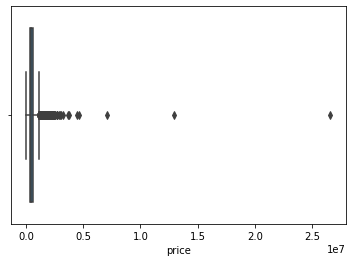

In [14]:
sns.boxplot(x=data['price'], data=data)

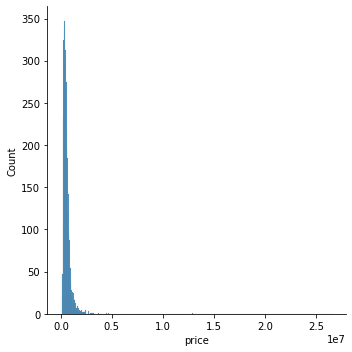

In [15]:
sns.displot(x=data['price'])

In [16]:
def remove_outliers(data, x):
    ##lets set the limits
    q25 = np.percentile(data[x], 25)
    q75 = np.percentile(data[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = 1, (q75 + cut_off)
    data = data[(data[x] < upper) & (data[x] > lower)]
    print(f"Outliers of {x} are removed\n")
    return data

In [17]:
data = remove_outliers(data, 'price')

Outliers of price are removed



In [18]:
data.shape

(4311, 18)

In [19]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4311.0,487456.901904,215659.641022,7800.0,320000.00,450000.00,615000.0,1150000.00
bedrooms,4311.0,3.351659,0.881215,0.0,3.00,3.00,4.0,9.00
bathrooms,4311.0,2.094352,0.715171,0.0,1.75,2.25,2.5,5.75
sqft_living,4311.0,2030.697982,810.138266,370.0,1430.00,1920.00,2510.0,7320.00
sqft_lot,4311.0,14598.596149,36141.110719,638.0,5000.00,7566.00,10696.5,1074218.00
floors,4311.0,1.495129,0.536898,1.0,1.00,1.50,2.0,3.50
waterfront,4311.0,0.003711,0.060815,0.0,0.00,0.00,0.0,1.00
view,4311.0,0.173742,0.644964,0.0,0.00,0.00,0.0,4.00
condition,4311.0,3.443749,0.669194,1.0,3.00,3.00,4.0,5.00
sqft_above,4311.0,1747.008583,763.543329,370.0,1170.00,1540.00,2190.0,7320.00


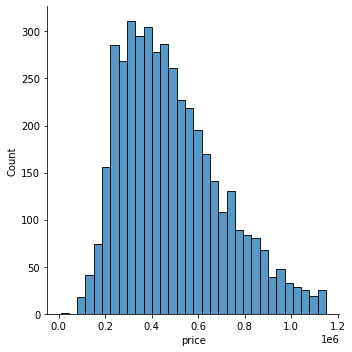

In [20]:
sns.displot(x=data['price'])

In [21]:
#converting the date type into datetime
data['date'] = pd.to_datetime(data['date'])
data['date'].dtype

dtype('<M8[ns]')

In [22]:
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month

In [23]:
data.drop(['year', 'date'], axis=1, inplace=True)

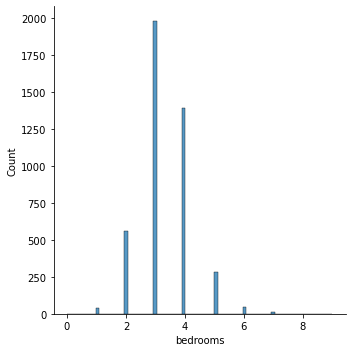

In [24]:
sns.displot(x=data['bedrooms'])

In [25]:
data['bedrooms'].value_counts()

3.0    1981
4.0    1394
2.0     557
5.0     282
6.0      47
1.0      37
7.0      10
9.0       1
0.0       1
8.0       1
Name: bedrooms, dtype: int64

In [26]:
data = data[(data['bedrooms'] > 0) & (data['bedrooms'] < 8)]
data['bedrooms'] = data['bedrooms'].astype('int')
data['bedrooms'].value_counts()

3    1981
4    1394
2     557
5     282
6      47
1      37
7      10
Name: bedrooms, dtype: int64

Bathrooms

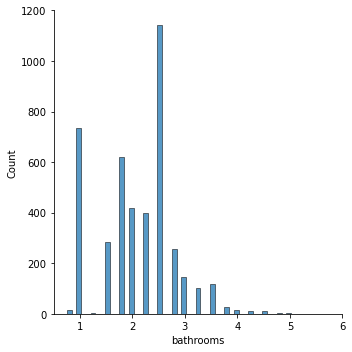

In [27]:
sns.displot(x=data['bathrooms'])

In [28]:
data['bathrooms'] = data['bathrooms'].astype('int')

Floors

In [29]:
data['floors'].value_counts()

1.0    2105
2.0    1640
1.5     415
3.0     120
2.5      27
3.5       1
Name: floors, dtype: int64

In [30]:
data['floors'] = data['floors'].astype('int')

WaterFront

In [31]:
data['waterfront'].value_counts()

0    4292
1      16
Name: waterfront, dtype: int64

Conditions

In [32]:
data['condition'].value_counts()

3    2702
4    1185
5     385
2      30
1       6
Name: condition, dtype: int64

<AxesSubplot:>

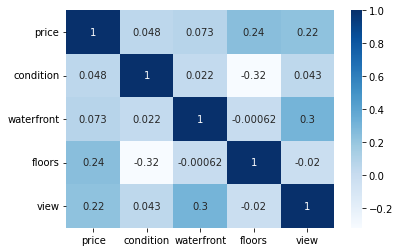

In [33]:
sns.heatmap(data[['price', 'condition', 'waterfront', 'floors', 'view']].corr(), annot=True, cmap="Blues")

"Sqrt_living", "sqft_lot", "sqrt_above", "sqrt_basement"

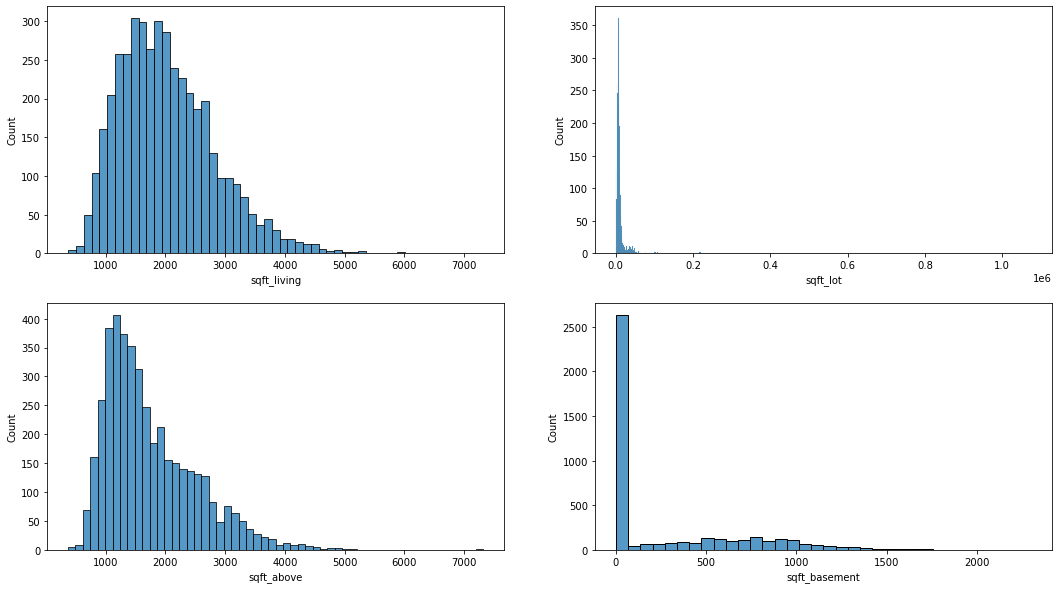

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
sns.histplot(ax=axes[0,0],x="sqft_living", data=data);
sns.histplot(ax=axes[0, 1],x="sqft_lot", data=data);
sns.histplot(ax=axes[1,0],x="sqft_above", data=data);
sns.histplot(ax=axes[1, 1],x="sqft_basement", data=data);

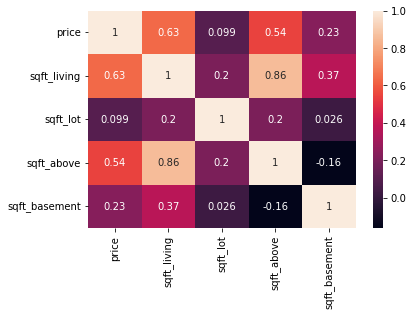

In [35]:
sns.heatmap(data[["price", "sqft_living", "sqft_lot", "sqft_above", "sqft_basement"]].corr(), annot=True);

Year Built

<AxesSubplot:xlabel='yr_built', ylabel='Count'>

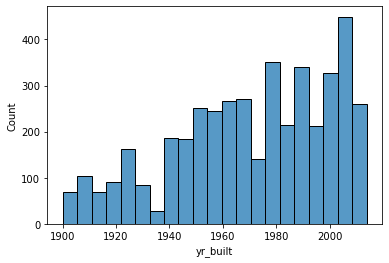

In [36]:
sns.histplot(x=data['yr_built'],data=data)

<AxesSubplot:xlabel='yr_built', ylabel='price'>

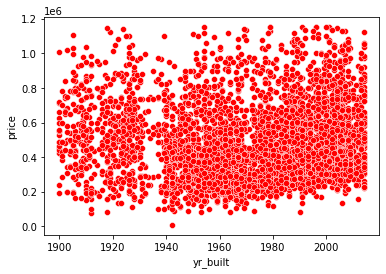

In [37]:
sns.scatterplot(x=data['yr_built'], y=data['price'], color='red')

Year Renovated

<AxesSubplot:xlabel='yr_renovated', ylabel='Count'>

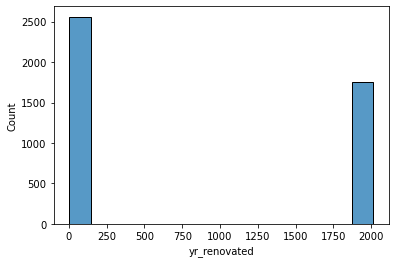

In [38]:
sns.histplot(x=data['yr_renovated'], data=data)

In [39]:
data['yr_renovated'] = data['yr_renovated'].apply(lambda x: x if x == 0 else 1)

In [40]:
data['yr_renovated'].value_counts()

0    2559
1    1749
Name: yr_renovated, dtype: int64

In [41]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,month
0,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,1,18810 Densmore Ave N,Shoreline,WA 98133,USA,5
2,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,5
3,420000.0,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,5
4,550000.0,4,2,1940,10500,1,0,0,4,1140,800,1976,1,9105 170th Ave NE,Redmond,WA 98052,USA,5
5,490000.0,2,1,880,6380,1,0,0,3,880,0,1938,1,522 NE 88th St,Seattle,WA 98115,USA,5


Country

In [42]:
data['country'].value_counts()

USA    4308
Name: country, dtype: int64

In [43]:
data['city'].value_counts()

Seattle                1459
Renton                  291
Bellevue                232
Redmond                 227
Kent                    183
Issaquah                183
Kirkland                176
Auburn                  175
Sammamish               166
Federal Way             145
Shoreline               120
Woodinville             111
Maple Valley             95
Burien                   72
Snoqualmie               69
Kenmore                  65
Des Moines               58
Mercer Island            50
North Bend               50
Duvall                   42
Covington                41
Lake Forest Park         34
Bothell                  33
Newcastle                31
Vashon                   29
SeaTac                   28
Tukwila                  28
Enumclaw                 27
Carnation                21
Normandy Park            16
Fall City                 9
Black Diamond             8
Ravensdale                7
Pacific                   6
Algona                    5
Clyde Hill          

<AxesSubplot:xlabel='city'>

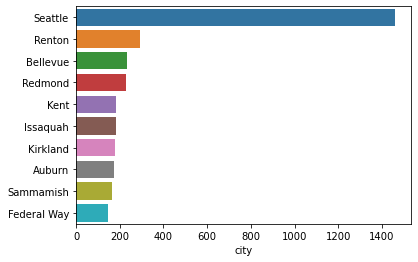

In [44]:
top_10_cities = data['city'].value_counts().head(10)
sns.barplot(x = top_10_cities, y=top_10_cities.index)

In [45]:
data['statezip'].value_counts()

WA 98103    144
WA 98052    133
WA 98117    129
WA 98115    124
WA 98059    104
           ... 
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
WA 98039      1
Name: statezip, Length: 77, dtype: int64

In [46]:
data.drop(['country', 'statezip', 'street'], axis=1, inplace=True)

In [47]:
data.head(2)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,month
0,313000.0,3,1,1340,7912,1,0,0,3,1340,0,1955,1,Shoreline,5
2,342000.0,3,2,1930,11947,1,0,0,4,1930,0,1966,0,Kent,5


Handling the Categorical data

In [48]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,313000.0,3,1,1340,7912,1,0,0,3,1340,...,0,0,1,0,0,0,0,0,0,0
2,342000.0,3,2,1930,11947,1,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,420000.0,3,2,2000,8030,1,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,550000.0,4,2,1940,10500,1,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0
5,490000.0,2,1,880,6380,1,0,0,3,880,...,0,1,0,0,0,0,0,0,0,0


Splitting the Dataset into X and Y

In [49]:
X = data.drop('price',axis=1)
y = data['price']

Splitting the dataset into training and testing

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [52]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Creating our model

In [53]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(f"Accuracy of training set:", lr.score(X_train, y_train))
print(f"Accuracy of testing set: ", lr.score(X_test, y_test))

Accuracy of training set: 0.6994372913476681
Accuracy of testing set:  0.6600697578812007


In [54]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
cv = cross_val_score(lr, X, y, cv=10)
print(np.mean(cv))

0.6707203238236719
